In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1SZ-hYkI8UgrfJlgwRWlNLHHHurqUj3Lh' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweets.csv')  

In [ ]:
pip install contractions emoji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,nltk,contractions,emoji 
sns.set_style('dark')

In [ ]:
def clean_date(date_obj):
  for x in range(0, len(date_obj)):
    if date_obj[x] == " ":
      break
  date_obj = date_obj[:x]
  return date_obj

def process_tweet(tweet):
  ## Twitter Features
    # replace retweet
  tweet = re.sub('RT\s+', "", tweet )
    # replace user tag
  tweet = re.sub('\B@\w+', "", tweet)
    # replace url
  tweet = re.sub('(http|https):\/\/\S+', "", tweet)
    # replace hashtag
  tweet = re.sub('#+', "", tweet)

  ## Word Features
    # lower case
  tweet = tweet.lower()
    # replace contractions
  tweet = contractions.fix(tweet)
    # replace punctuation repetition
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", tweet)
    # replace word repetition
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    # replace emojis
  tweet = emoji.demojize(tweet)

  return tweet

df = pd.read_csv('tweets.csv',
                 lineterminator='\n')
df = df[df["Language\r"]=="en\r"].drop(['Unnamed: 0', 'Tweet Id', 'Language\r'],axis=1)
df["Datetime"] = df["Datetime"].apply(clean_date)
df["Clean Text"] = df["Text"].apply(process_tweet)
df['Clean Text']= df['Clean Text'].str.replace('[^\w\s]','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
pip install gensim

In [ ]:
import nltk, gensim
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize_stemming(text):
    return (WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


In [ ]:
df["Processed"] = df["Clean Text"].apply(preprocess)

In [ ]:
l_words = df["Processed"].tolist()


In [ ]:
l_words

In [ ]:
dictionary = gensim.corpora.Dictionary(l_words)


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in l_words]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


Topic: 0 
Words: 0.038*"data" + 0.028*"say" + 0.020*"study" + 0.017*"mrna" + 0.016*"moderna" + 0.016*"show" + 0.013*"protection" + 0.011*"months" + 0.010*"jab" + 0.010*"evidence"


Topic: 1 
Words: 0.022*"vaccinate" + 0.019*"work" + 0.017*"months" + 0.016*"immunity" + 0.014*"virus" + 0.013*"know" + 0.012*"effective" + 0.011*"israel" + 0.011*"mask" + 0.010*"delta"


Topic: 2 
Words: 0.028*"recommend" + 0.026*"health" + 0.020*"risk" + 0.019*"older" + 0.019*"panel" + 0.018*"offer" + 0.016*"pfizers" + 0.014*"high" + 0.014*"group" + 0.013*"vote"


Topic: 3 
Words: 0.017*"get" + 0.014*"go" + 0.014*"countries" + 0.012*"want" + 0.012*"like" + 0.012*"year" + 0.011*"wait" + 0.011*"think" + 0.009*"know" + 0.009*"vaccinate"


Topic: 4 
Words: 0.037*"moderna" + 0.036*"plan" + 0.033*"say" + 0.027*"biden" + 0.026*"receive" + 0.020*"news" + 0.019*"health" + 0.017*"start" + 0.016*"johnson" + 0.012*"house"




In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.345624 -0.121273       1        1  28.040686
0      0.312741 -0.179749       2        1  25.624757
2     -0.002342 -0.098409       3        1  25.030041
3      0.035225  0.399431       4        1  21.304516, topic_info=           Term         Freq        Total Category  logprob  loglift
82    vaccinate  7970.000000  7970.000000  Default  30.0000  30.0000
270      months  8212.000000  8212.000000  Default  29.0000  29.0000
78          say  6730.000000  6730.000000  Default  28.0000  28.0000
84         work  6615.000000  6615.000000  Default  27.0000  27.0000
110       biden  5786.000000  5786.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
664      reason   932.882540   933.663812   Topic4  -5.1182   1.5454
835     rollout  1420.682637  1424.798027   Topic4  -4.6976   1.5434
834  population  1071.475031  1072.407275   Topic4  -4.9797   1.5454
404         ask   948.118206   951.485043   Topic4  -5.1020   1.5427
48        start  2547.150526  3259.343056   Topic4  -4.1138   1.2997

[164 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
440       3  0.999757      administer
881       3  0.999205  administration
1338      3  0.999865          agency
123       3  0.999749           ahead
3062      3  0.999342            amid
...     ...       ...             ...
84        2  0.999915            work
363       1  0.999158           world
23        2  0.999585            year
24        2  0.999622           years
1432      3  0.999624            yous

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [ ]:
pip install bokeh

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4



In [ ]:
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

In [ ]:
lda_model[bow_corpus][0]

[(0, 0.015508354),
 (1, 0.26287892),
 (2, 0.17269221),
 (3, 0.53332484),
 (4, 0.015595694)]

In [ ]:
pyLDAvis.save_html(vis, 'lda_booster_4Topics.html')

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 3886
Number of documents: 80759


In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=bow_corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


Text(0.5, 1.0, 'Number of Documents by Topic Weightage')

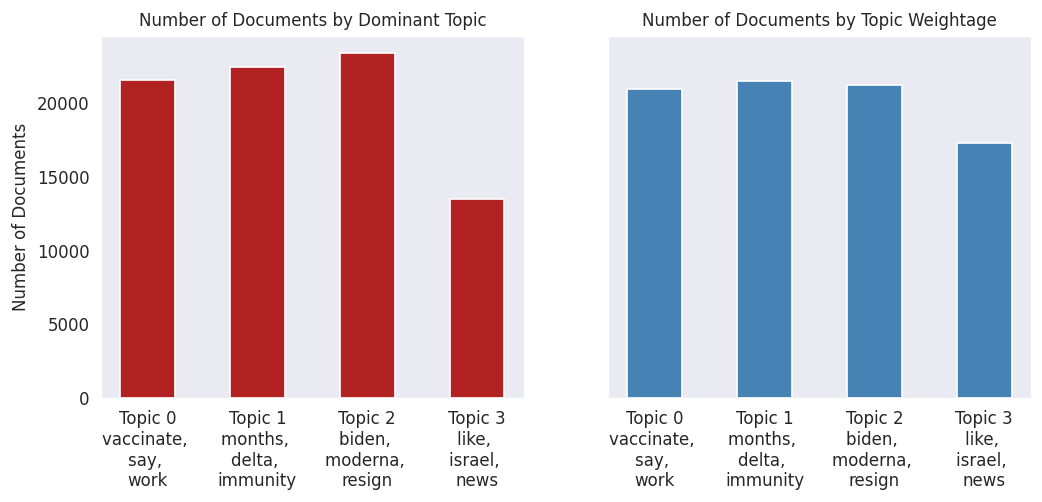

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
